In [2]:
import numpy as np
import cv2 as cv

from matplotlib import pyplot as plt

#Задание 1:

Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg

#Задание 2:

Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg.

#Задание 3:

Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

## Читаем изображение

In [32]:
img = cv.imread("./starry_night.jpg")

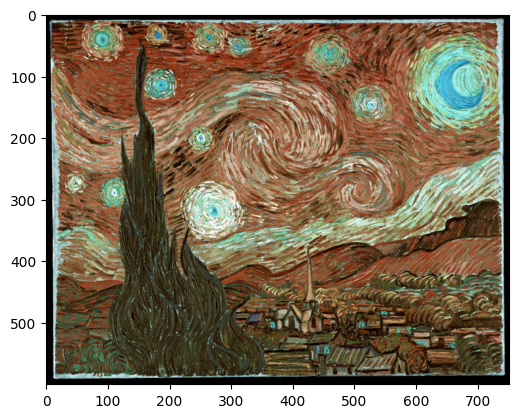

In [33]:
plt.imshow(img)

## Задание 1:

In [34]:
def BGR2RGB(img):
    return img[:, :, ::-1]

In [35]:
new_img = BGR2RGB(img)

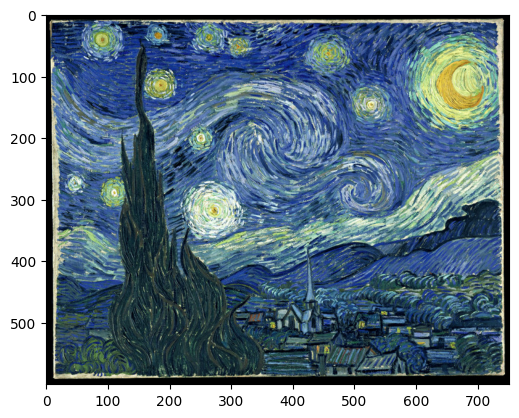

In [36]:
plt.imshow(new_img)

## Задание 2:

In [37]:
def swap_crops(
    img,
    bias_x,
    bias_y
):

    funnel = img[150:150 + bias_y, 300:300+bias_x, :]
    moon = img[20:20 + bias_y, 550:550+bias_x, :]

    new_img = img.copy()
    new_img[20:20 + bias_y, 550:550+bias_x, :] = funnel
    new_img[150:150 + bias_y, 300:300+bias_x, :] = moon

    return new_img

In [38]:
new_img = swap_crops(BGR2RGB(img), 170, 150)

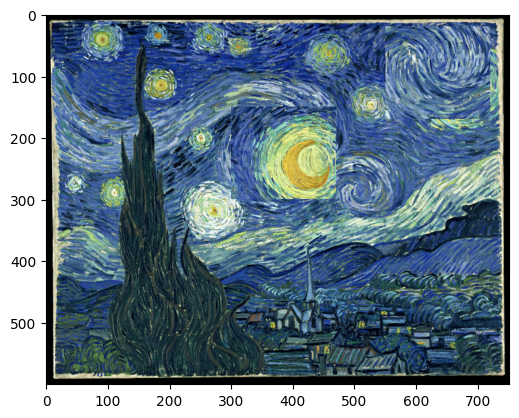

In [39]:
plt.imshow(new_img)

## Задание 3:

In [46]:
def increase_brightness(img, value=30):
    hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(hsv)
    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value
    final_hsv = cv.merge((h, s, v))
    return cv.cvtColor(final_hsv, cv.COLOR_HSV2RGB)

In [57]:
new_img = increase_brightness(BGR2RGB(img), value=80)

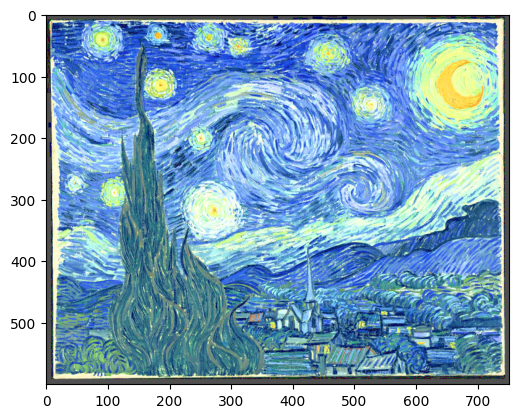

In [58]:
plt.imshow(new_img)